PROBLEM STATEMENT :-   Developing a machine learning model for diamond price prediction, leveraging key features such as carat ,clarity,
 cut quality, and color grade etc. The objective is to enhance pricing accuracy in the diamond industry, benefiting jewelers, 
 investors, and consumers.


Importing Module


In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing CSV data as Pandas DataFrame 

In [129]:
df = pd.read_csv('data/gemstone.csv')
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [130]:
df = df.drop(df.columns[0], axis=1)
df.head(10)



,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [131]:
df.shape


(26967, 10)

DATA CHECK TO PERFORM  -----

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [132]:
#checking missing value
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [133]:
#dropping na value

df = df.dropna()

In [134]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [135]:
#checking Duplicates

df.duplicated().sum()

34

In [136]:
#removing duplicate value
df = df.drop_duplicates()

In [137]:
df.duplicated().sum()

0

In [138]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26236 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26236 non-null  float64
 1   cut      26236 non-null  object 
 2   color    26236 non-null  object 
 3   clarity  26236 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26236 non-null  float64
 6   x        26236 non-null  float64
 7   y        26236 non-null  float64
 8   z        26236 non-null  float64
 9   price    26236 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [139]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [140]:
df.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
5694,0.90,Premium,D,SI1,59.5,57.0,6.29,6.21,3.72,3689
11733,0.30,Ideal,E,VVS2,61.9,59.0,4.27,4.30,2.65,766
6949,1.51,Good,F,VS2,64.0,59.0,7.16,7.08,4.56,8794
7439,0.57,Very Good,H,VVS2,62.2,56.0,5.32,5.35,3.31,1726
21145,0.52,Premium,G,VS2,62.1,58.0,5.18,5.15,3.21,1577


In [141]:
#Checking the number of unique values of each column

df.nunique()

carat       256
cut           5
color         7
clarity       8
depth       169
table       112
x           530
y           525
z           354
price      8629
dtype: int64

In [142]:
# statistics of data set

df.describe()


,carat,depth,table,x,y,z,price
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [143]:
# X , Y , Z cant be zero as it is dimension. so removing whose vaalue is 0.
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
df.shape

(26228, 10)

In [144]:
df.describe()

,carat,depth,table,x,y,z,price
count,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000
mean,0.797425,61.745573,57.455216,5.728685,5.732539,3.537417,3934.616288
std,0.476534,1.411824,2.230013,1.125010,1.164034,0.695979,4018.196388
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5355.250000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [145]:
#there is outlier here , so removing 5% from both bottom and top

top_threshold = df['price'].quantile(0.95) 
bottom_threshold = df['price'].quantile(0.05)

df = df[(df['price'] >= bottom_threshold ) & (df['price'] <= top_threshold ) ]

df.shape

(23631, 10)

In [146]:
# cat and num columns



numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])

print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


In [147]:
df[categorical_columns]["cut"].value_counts()



cut
Ideal        9611
Premium      6054
Very Good    5129
Good         2124
Fair          713
Name: count, dtype: int64

In [148]:
df[categorical_columns]["color"].value_counts()



color
G    5044
E    4451
F    4255
H    3444
D    3060
I    2207
J    1170
Name: count, dtype: int64

In [149]:
df[categorical_columns]["clarity"].value_counts()

clarity
SI1     5767
VS2     5313
SI2     3880
VS1     3567
VVS2    2270
VVS1    1670
IF       831
I1       333
Name: count, dtype: int64

In [150]:
# Numerical column Describe
df.describe()

,carat,depth,table,x,y,z,price
count,23631.000000,23631.000000,23631.000000,23631.000000,23631.000000,23631.000000,23631.000000
mean,0.763114,61.743841,57.450709,5.686950,5.690181,3.511407,3465.042275
std,0.401628,1.420438,2.231222,1.001371,1.053067,0.621536,3016.186197
min,0.230000,50.800000,49.000000,3.920000,3.920000,1.070000,544.000000
25%,0.410000,61.000000,56.000000,4.760000,4.770000,2.940000,1007.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2369.000000
75%,1.020000,62.500000,59.000000,6.480000,6.480000,4.010000,4974.500000
max,3.500000,73.600000,79.000000,9.650000,58.900000,8.060000,13196.000000


In [151]:
# Categorical column describe
df[categorical_columns].describe()

,cut,color,clarity
count,23631,23631,23631
unique,5,7,8
top,Ideal,G,SI1
freq,9611,5044,5767


In [152]:
#to see for outlier again
top_50 =df.nlargest(50 , 'price')
#top_50

In [153]:
df.shape

(23631, 10)

In [154]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [155]:
df["clarity"].unique()

array(['IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI1', 'SI2', 'I1'],
      dtype=object)

In [156]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [157]:
df["color"].unique()

array(['G', 'E', 'F', 'D', 'H', 'J', 'I'], dtype=object)

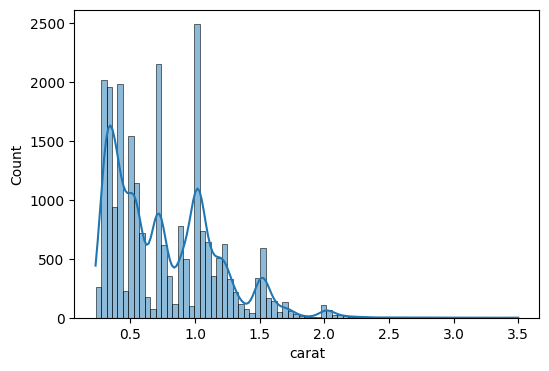

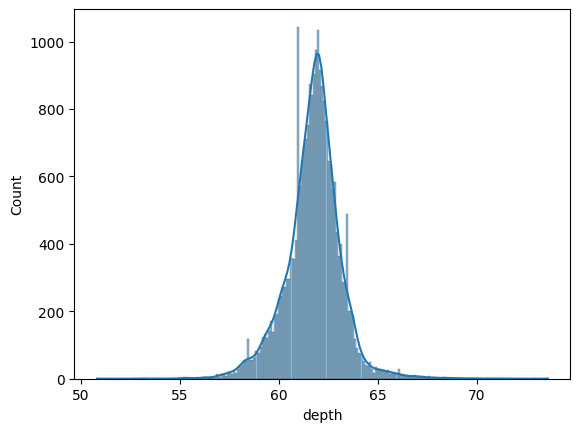

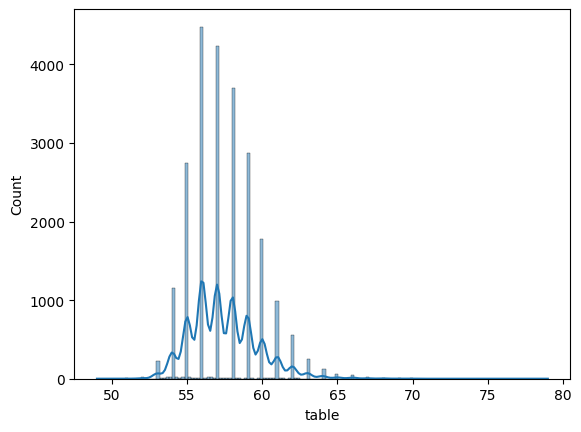

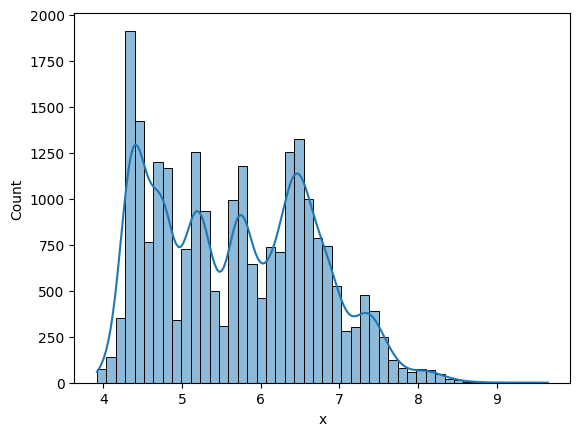

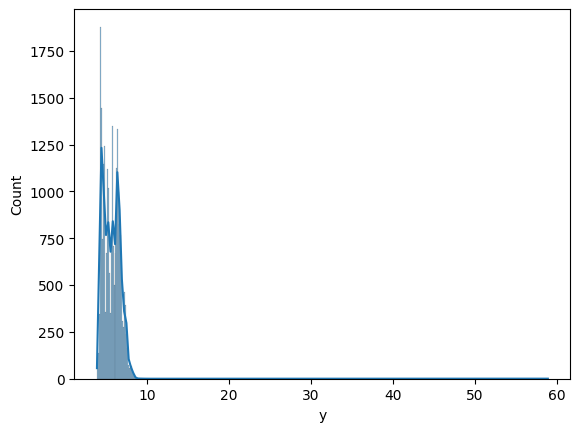

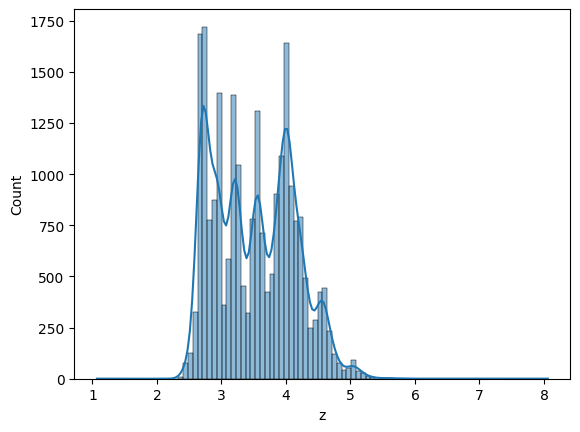

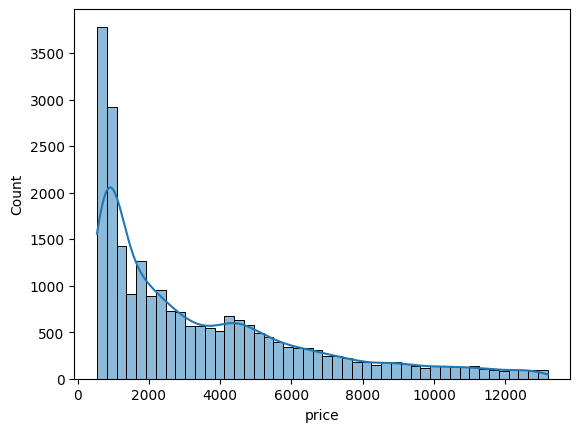

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=df,x=col,kde=True)
    print("\n")
    plt.show()

In [160]:
#saving  cleaned data after EDA,

import os



file_name = 'gemstone.csv'

if os.path.exists(file_name):
    os.remove(file_name)

df.to_csv(file_name , index = False)